# Bicycle Theft Data Exploration

This notebook explores the Toronto Bicycle Theft dataset from 2014-2018.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/Bicycle_Thefts_Data.csv')

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\nFirst few rows:")
df.head()

Dataset Shape: (37178, 35)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37178 entries, 0 to 37177
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           37178 non-null  int64  
 1   EVENT_UNIQUE_ID    37178 non-null  object 
 2   PRIMARY_OFFENCE    37178 non-null  object 
 3   OCC_DATE           37178 non-null  object 
 4   OCC_YEAR           37178 non-null  int64  
 5   OCC_MONTH          37178 non-null  object 
 6   OCC_DOW            37178 non-null  object 
 7   OCC_DAY            37178 non-null  int64  
 8   OCC_DOY            37178 non-null  int64  
 9   OCC_HOUR           37178 non-null  int64  
 10  REPORT_DATE        37178 non-null  object 
 11  REPORT_YEAR        37178 non-null  int64  
 12  REPORT_MONTH       37178 non-null  object 
 13  REPORT_DOW         37178 non-null  object 
 14  REPORT_DAY         37178 non-null  int64  
 15  REPORT_DOY         37178 non

,OBJECTID,EVENT_UNIQUE_ID,PRIMARY_OFFENCE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_DOY,OCC_HOUR,REPORT_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DOW,REPORT_DAY,REPORT_DOY,REPORT_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,BIKE_MAKE,BIKE_MODEL,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
0,1,GO-20141263784,PROPERTY - FOUND,1/1/2014 5:00:00 AM,2014,January,Wednesday,1,1,18,1/1/2014 5:00:00 AM,2014,January,Wednesday,1,1,18,D14,"Single Home, House (Attach Garage, Cottage, Mo...",House,TREK,SOHO S,RG,1.0,BLK,NaN,RECOVERED,080,Palmerston-Little Italy (80),080,Palmerston-Little Italy (80),-79.414654,43.660525,-8.840399e+06,5.413057e+06
1,2,GO-20141263544,B&E,12/26/2013 5:00:00 AM,2013,December,Thursday,26,360,19,1/1/2014 5:00:00 AM,2014,January,Wednesday,1,1,17,D14,Other Commercial / Corporate Places (For Profi...,Commercial,FELT,F59,RC,21.0,SILRED,1300.0,STOLEN,165,Harbourfront-CityPlace (165),077,Waterfront Communities-The Island (77),-79.395643,43.640021,-8.838283e+06,5.409903e+06
2,3,GO-20141261431,THEFT UNDER,1/1/2014 5:00:00 AM,2014,January,Wednesday,1,1,7,1/1/2014 5:00:00 AM,2014,January,Wednesday,1,1,7,D14,"Apartment (Rooming House, Condo)",Apartment,SUPERCYCLE,NaN,MT,10.0,NaN,NaN,STOLEN,085,South Parkdale (85),085,South Parkdale (85),-79.443645,43.637657,-8.843626e+06,5.409539e+06
3,4,GO-20141267465,THEFT UNDER,9/30/2013 5:00:00 AM,2013,September,Monday,30,273,0,1/2/2014 5:00:00 AM,2014,January,Thursday,2,2,12,D14,"Apartment (Rooming House, Condo)",Apartment,NORCO,CHARGER 9.2,MT,21.0,BLK,750.0,STOLEN,078,Kensington-Chinatown (78),078,Kensington-Chinatown (78),-79.404678,43.648964,-8.839288e+06,5.411278e+06
4,5,GO-20149000074,THEFT UNDER,12/25/2013 5:00:00 AM,2013,December,Wednesday,25,359,16,1/2/2014 5:00:00 AM,2014,January,Thursday,2,2,16,D51,"Apartment (Rooming House, Condo)",Apartment,CA,RZ 120 1,MT,21.0,WHI,1500.0,STOLEN,168,Downtown Yonge East (168),075,Church-Yonge Corridor (75),-79.372690,43.652377,-8.835727e+06,5.411803e+06


In [3]:
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})

print("Missing Data Analysis:")
print(missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

Missing Data Analysis:
             Missing Values  Percentage
BIKE_MODEL            13707   36.868578
BIKE_COLOUR            3292    8.854699
BIKE_COST              2490    6.697509
BIKE_SPEED             1135    3.052881
BIKE_MAKE               183    0.492227


In [4]:
print("Statistical Summary of Numerical Columns:")
df.describe()

Statistical Summary of Numerical Columns:


,OBJECTID,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,BIKE_SPEED,BIKE_COST,LONG_WGS84,LAT_WGS84,x,y
count,37178.000000,37178.000000,37178.000000,37178.000000,37178.000000,37178.000000,37178.000000,37178.000000,37178.000000,36043.000000,34688.000000,37178.000000,37178.000000,3.717800e+04,3.717800e+04
mean,18589.500000,2018.718436,15.645382,199.930766,13.292619,2018.740680,15.979881,201.005702,14.263946,14.102711,1000.067885,-78.687703,43.285726,-8.759475e+06,5.367007e+06
std,10732.508491,2.987905,8.637666,77.454583,6.526714,2.968978,8.600372,77.696535,5.086319,10.714546,1595.093249,7.458295,4.102826,8.302536e+05,5.087229e+05
min,1.000000,1975.000000,1.000000,1.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-79.622226,0.000000,-8.863506e+06,5.664924e-09
25%,9295.250000,2016.000000,8.000000,149.000000,9.000000,2016.000000,9.000000,151.000000,11.000000,6.000000,399.000000,-79.418687,43.650276,-8.840848e+06,5.411480e+06
50%,18589.500000,2019.000000,16.000000,203.000000,14.000000,2019.000000,16.000000,205.000000,14.000000,15.000000,679.989990,-79.390666,43.662203,-8.837728e+06,5.413315e+06
75%,27883.750000,2021.000000,23.000000,257.000000,18.000000,2021.000000,23.000000,258.000000,18.000000,21.000000,1172.539978,-79.372806,43.683563,-8.835740e+06,5.416603e+06
max,37178.000000,2024.000000,31.000000,366.000000,23.000000,2024.000000,31.000000,366.000000,23.000000,99.000000,120000.000000,0.000000,43.837237,6.327780e-09,5.440289e+06


## Data Visualizations

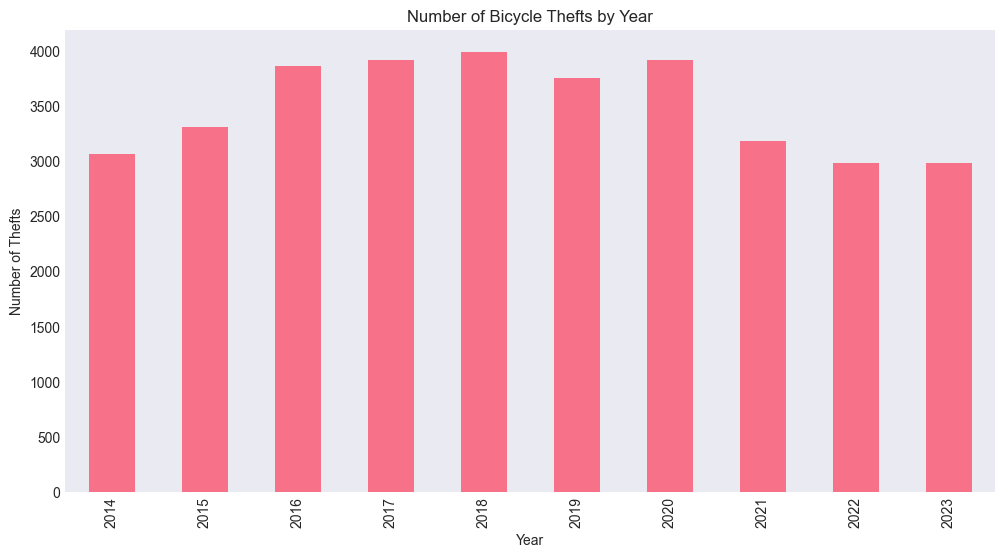

In [5]:
plt.figure(figsize=(12, 6))
# Omit years before 2014 due to lack of data and 2024 due to incomplete year
df_filtered = df[(df["OCC_YEAR"] >= 2014) & (df["OCC_YEAR"] < 2024)]
df_filtered["OCC_YEAR"].value_counts().sort_index().plot(kind="bar")
# count total thefts
total_thefts = df_filtered["OCC_YEAR"].value_counts().sum()
plt.title("Number of Bicycle Thefts by Year")
plt.xlabel("Year")
plt.ylabel("Number of Thefts")
plt.show()


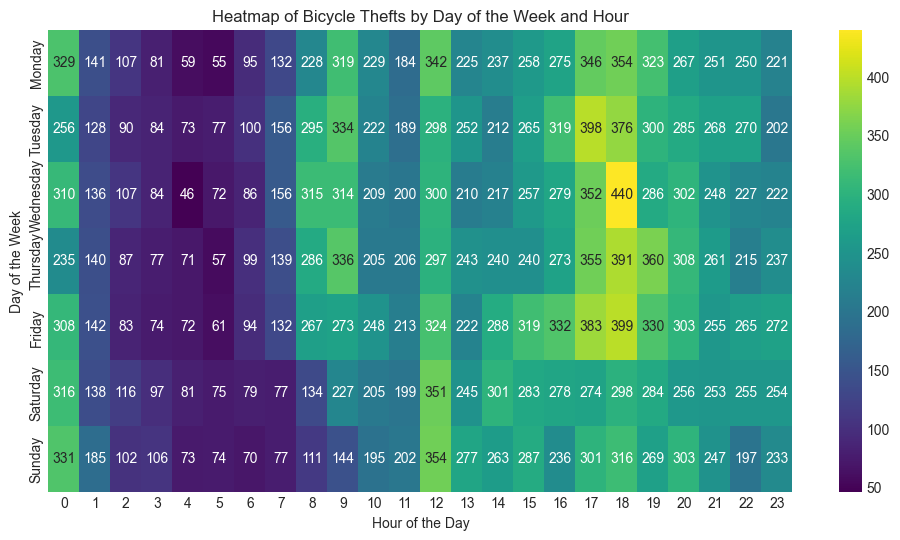

In [6]:
# Create a pivot table to count the number of thefts for each combination of day and hour
pivot_table = df.pivot_table(index="OCC_DOW", columns="OCC_HOUR", aggfunc="size", fill_value=0)

# Reorder the days of the week
pivot_table = pivot_table.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Plot the data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="viridis", annot=True, fmt="d")
plt.title("Heatmap of Bicycle Thefts by Day of the Week and Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

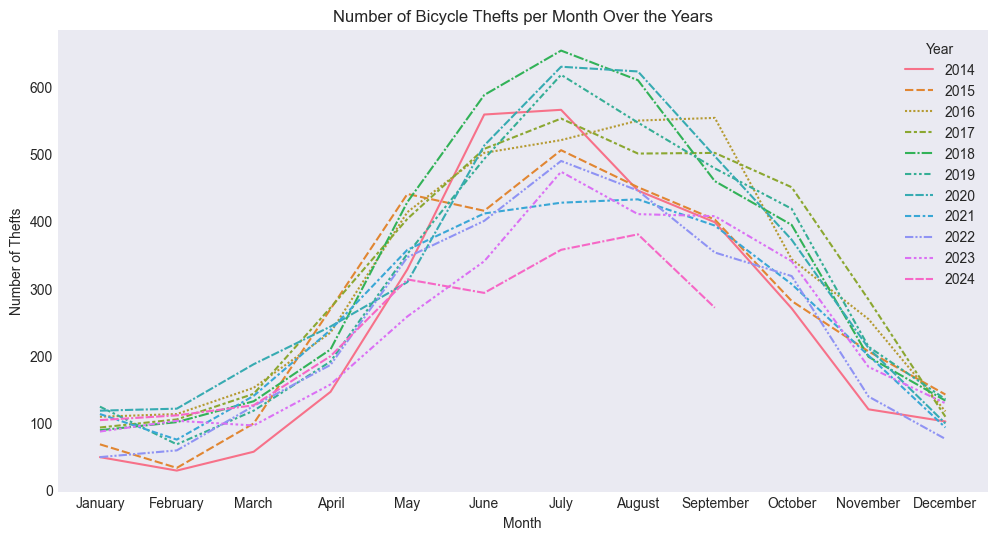

In [7]:
# Group the data by year and month, and count the number of thefts
monthly_thefts = df.groupby(["OCC_YEAR", "OCC_MONTH"]).size().reset_index(name="THEFT_COUNT")

# Only use data from 2014 onwards
monthly_thefts = monthly_thefts[monthly_thefts["OCC_YEAR"] >= 2014]

# Convert the month column to a categorical type with the correct order
monthly_thefts["OCC_MONTH"] = pd.Categorical(
    monthly_thefts["OCC_MONTH"],
    categories=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
    ordered=True,
)

# Pivot the data to have years as columns and months as rows
pivot_table = monthly_thefts.pivot(index="OCC_MONTH", columns="OCC_YEAR", values="THEFT_COUNT")

# Plot the data using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table)
plt.title("Number of Bicycle Thefts per Month Over the Years")
plt.xlabel("Month")
plt.ylabel("Number of Thefts")
plt.legend(title="Year", bbox_to_anchor=(1, 1))
plt.show()